In [37]:
import pandas as pd
import subprocess
import re
import matplotlib.pyplot as plot

def getResults(results, regX):
    value = re.search(regX, results)
    if value:
        return value.group(1)
    return None


In [38]:
compile = subprocess.run(["make"])
if compile.returncode != 0:
    print(f"Compilation Error : {compile.stderr}")

# Experiment 1 - Simulate SMITH N-BIT COUNTER PREDICTOR configurations for 1 <= b<=6.
# (Note: The initial counter values will be 16 and 32 when b is 5 and 6 respectively)
# b = 1-6
# trace = gcc, jpeg, perl

traces = ["gcc", "jpeg", "perl"]
xLabels = []
mispredRates = []

for i in range(1, 7):
    xLabels.append(i)

for i in range(3): # 0 to 2
    trace = traces[i]
    for j in range(1, 7): # 1 to 6
        outputFile = "".join(["ExpOutputs/Exp1/output_", trace, "_b_", str(j), ".txt"])
        
        with open(outputFile, "w") as output:
            run = subprocess.run(["java", "sim", "smith", str(j), "".join(["traces/", trace, "_trace.txt"])], stdout=output, stderr=subprocess.PIPE, text=True)
            if run.returncode != 0:
                print(f"Execution Error : {run.stderr}")

        with open(outputFile, "r") as output:
            results = output.read()

        mispredRate = float(getResults(results, "misprediction rate:\s*([0-9.]+)"))
        mispredRates.append(mispredRate)


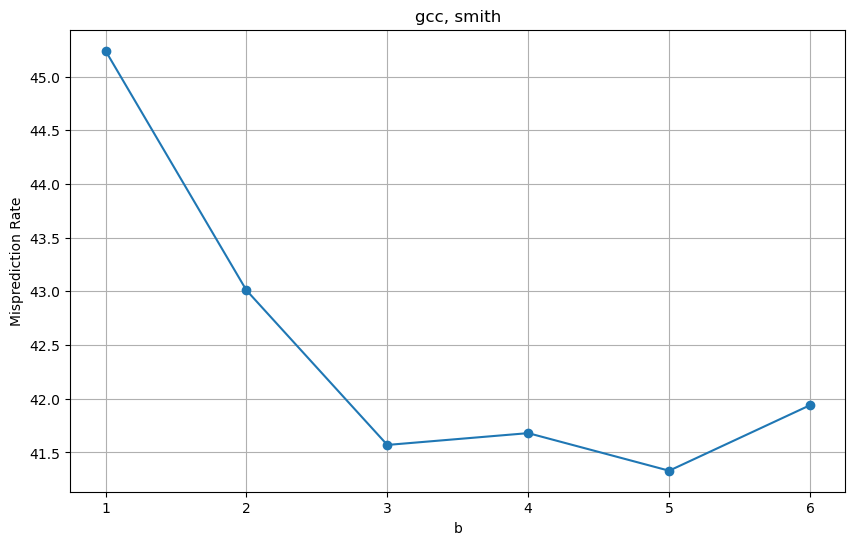

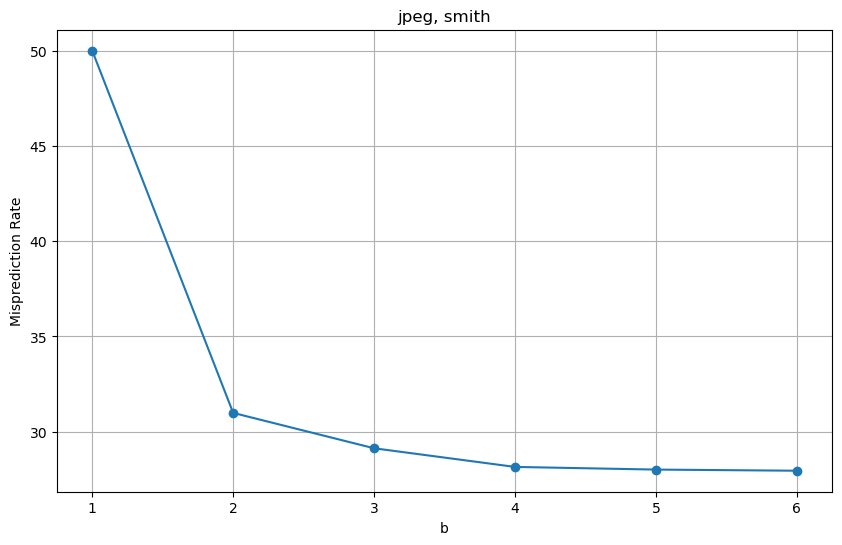

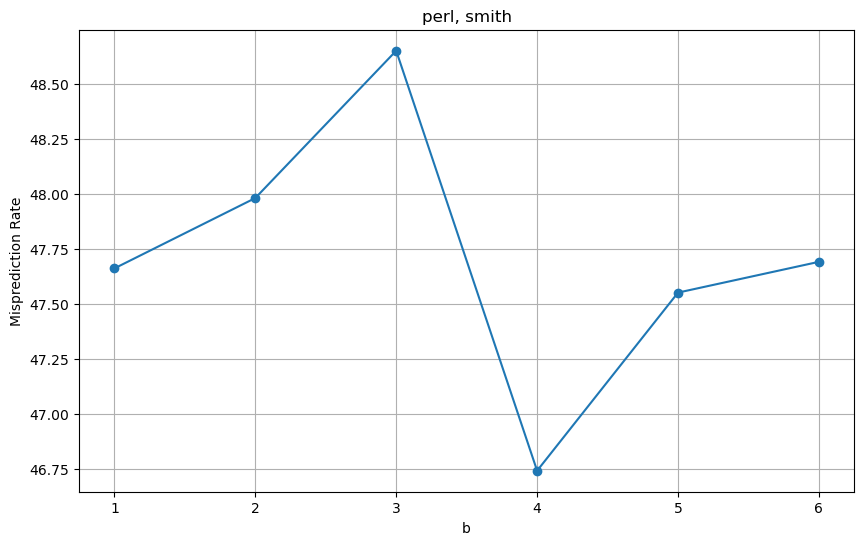

In [39]:
# GRAPH #1 (total number of simulations/graphs: 6 sims / 3 graphs)
# ================================================================
# Produce one graph for each benchmark.
# Graph title: “<benchmark>, smith”.
# X-axis: b.
# Y-axis: branch misprediction rate.
# Per graph, there should be only one curve consisting of 6 
# datapoints (connect the datapoints with a line).

for i in range(3):
    plot.figure(figsize=(10,6))
    mispredRateGroup = []
    for j in range(6):
        mispredRateGroup.append(mispredRates[j + (i * 6)])
    plot.plot(xLabels, mispredRateGroup, marker='o')

    plot.xlabel("b")
    plot.ylabel("Misprediction Rate")
    plot.title(traces[i] + ", smith")
    plot.grid(True)
    plot.show()
    

In [44]:
# Experiment 2 - Simulate BIMODAL PREDICTOR configurations for 7 <= m <= 12. 
# Use the traces in the trace directory.
# m = 7-12
# trace = gcc, jpeg, perl

xLabels = []
mispredRates = []

for i in range(7, 13):
    xLabels.append(i)

for i in range(3): # 0 to 2
    trace = traces[i]
    for j in range(7, 13): # 7 to 12
        outputFile = "".join(["ExpOutputs/Exp2/output_", trace, "_m_", str(j), ".txt"])
        
        with open(outputFile, "w") as output:
            run = subprocess.run(["java", "sim", "bimodal", str(j), "".join(["traces/", trace, "_trace.txt"])], stdout=output, stderr=subprocess.PIPE, text=True)
            if run.returncode != 0:
                print(f"Execution Error : {run.stderr}")

        with open(outputFile, "r") as output:
            results = output.read()

        mispredRate = float(getResults(results, "misprediction rate:\s*([0-9.]+)"))
        mispredRates.append(mispredRate)
        

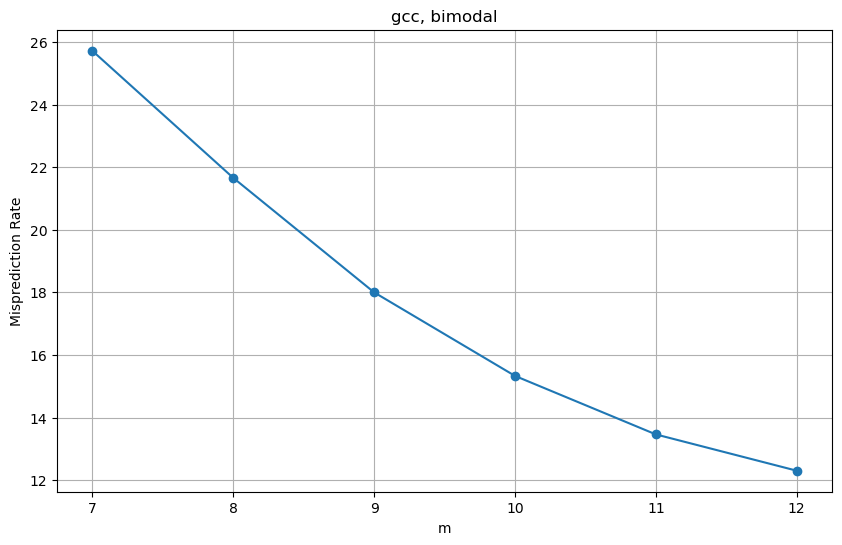

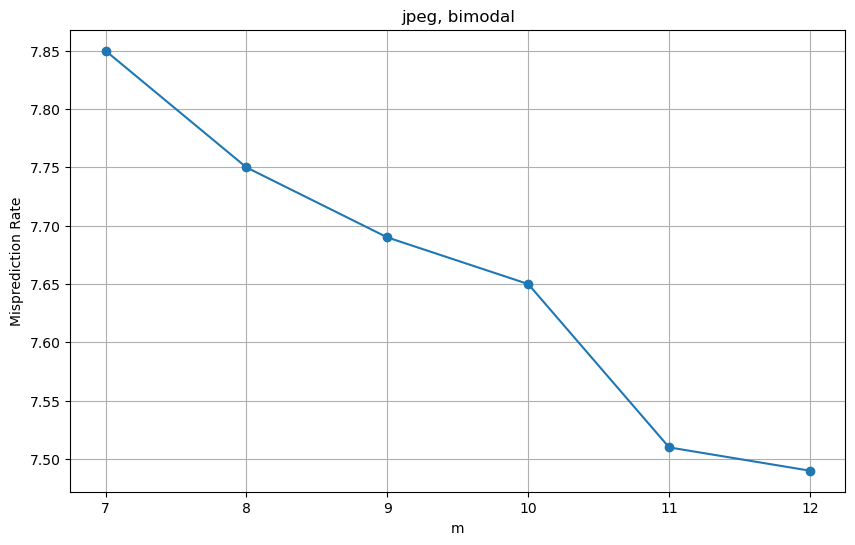

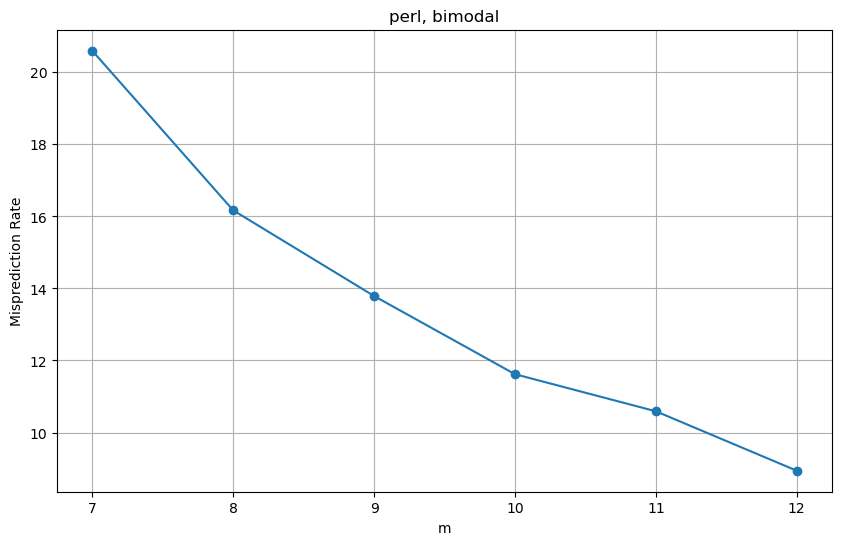

In [45]:
# GRAPH #2 (total number of simulations/graphs: 6 sims / 3 graphs)
# ================================================================
# # Graphs: produce one graph for each benchmark.
# Graph title: “<benchmark>, bimodal”.
# X-axis: m.
# Y-axis: branch misprediction rate.
# Per graph, there should be only one curve consisting of 6 
# datapoints (connect the datapoints with a line).

for i in range(3):
    plot.figure(figsize=(10,6))
    mispredRateGroup = []
    for j in range(6):
        mispredRateGroup.append(mispredRates[j + (i * 6)])
    plot.plot(xLabels, mispredRateGroup, marker='o')

    plot.xlabel("m")
    plot.ylabel("Misprediction Rate")
    plot.title(traces[i] + ", bimodal")
    plot.grid(True)
    plot.show()
    

In [46]:
# Experiment 3 - Simulate GSHARE PREDICTOR configurations for
# 7 <= m <= 12 and 2 <= n <= m, n is even.
# Use the traces in the trace directory.

xLabels = []
mispredRates = []

for i in range(7, 13):
    xLabels.append(i)

for i in range(3): # 0 to 2
    trace = traces[i]
    for j in range(7, 13): # 7 to 12
        for k in range(2, j + 1, 2): # 2 to j by 2s
            outputFile = "".join(["ExpOutputs/Exp3/output_", trace, "_m_", str(j), "_n_", str(k), ".txt"])
            
            with open(outputFile, "w") as output:
                run = subprocess.run(["java", "sim", "gshare", str(j), str(k), "".join(["traces/", trace, "_trace.txt"])], stdout=output, stderr=subprocess.PIPE, text=True)
                if run.returncode != 0:
                    print(f"Execution Error : {run.stderr}")

            with open(outputFile, "r") as output:
                results = output.read()

            mispredRate = float(getResults(results, "misprediction rate:\s*([0-9.]+)"))
            mispredRates.append((i,j, k, mispredRate))


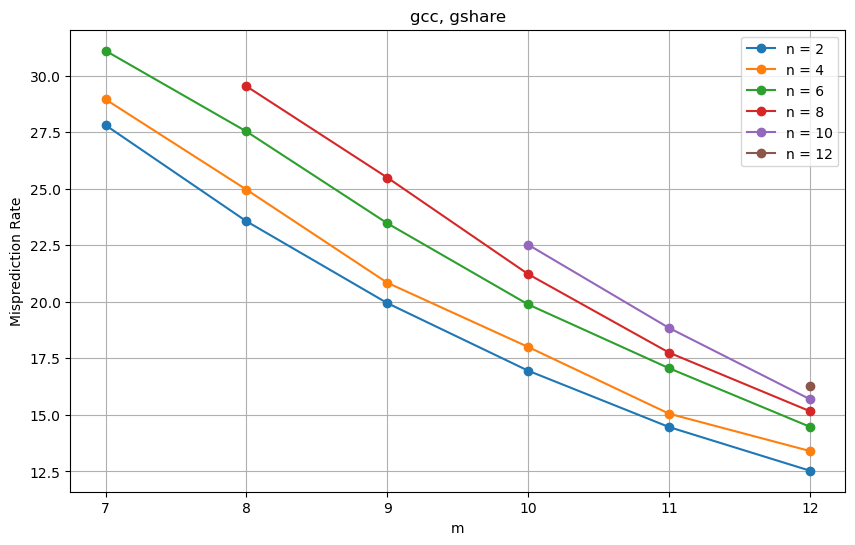

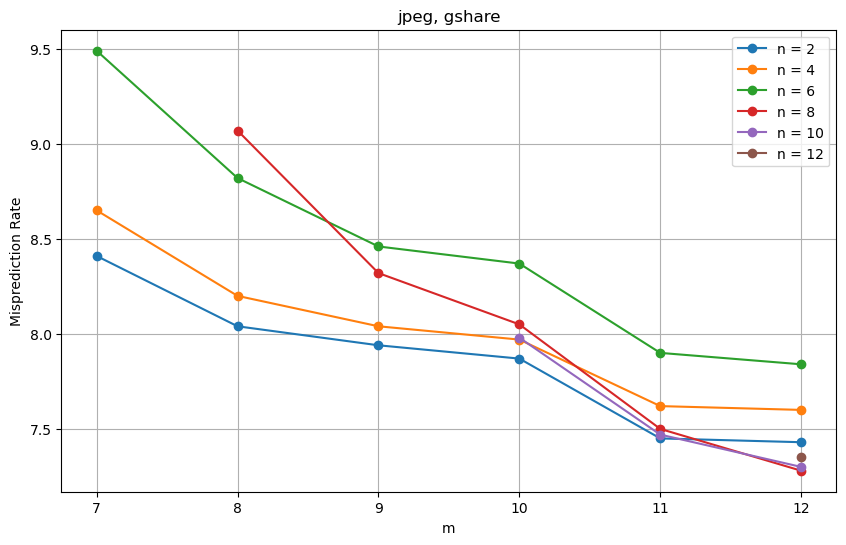

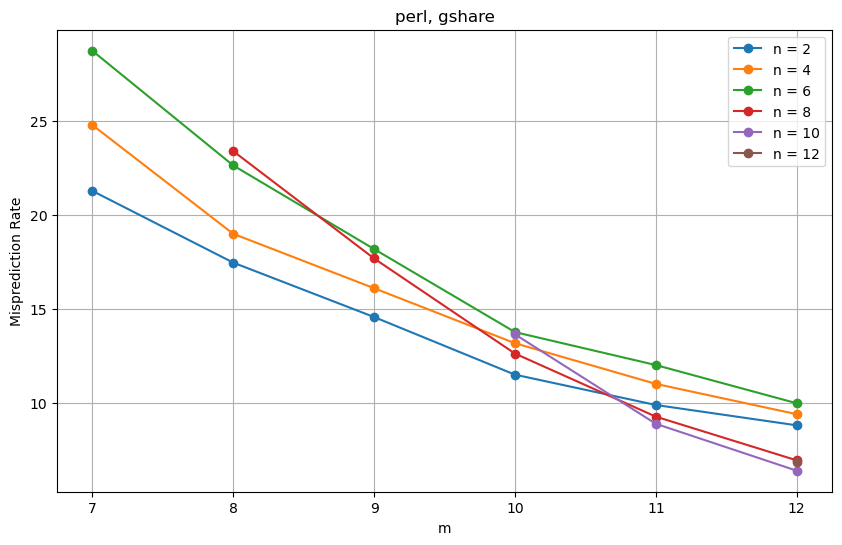

In [50]:
# GRAPH #3 (total number of simulations/graphs: 27 sims / 3 graphs)
# ================================================================
# # Graphs: produce one graph for each benchmark. 
# Graph title: “<benchmark>, gshare”.
# X-axis: m.  
# Y-axis: branch misprediction rate. 
# Per graph, there should be a total 27 datapoints plotted as a 
# family of 6 curves. Datapoints having the same value of n are 
# connected with a line, i.e., one curve for each value of n. 
# Note that not all curves have the same number of datapoints. 

gcc = {"2": {}, "4": {}, "6": {}, "8": {}, "10": {}, "12": {}}
jpeg = {"2": {}, "4": {}, "6": {}, "8": {}, "10": {}, "12": {}}
perl = {"2": {}, "4": {}, "6": {}, "8": {}, "10": {}, "12": {}}
results = [gcc, jpeg, perl]
for i, m, n, rate in mispredRates:
    results[i][str(n)][str(m)] = rate

for i in range(3):
    plot.figure(figsize=(10,6))
    for n in range(2, 13, 2):
        lim = 0
        mispredRateGroup = []
        label = f"n = {n}"
        for m in results[i][str(n)]:
            mispredRateGroup.append(results[i][str(n)][m])
        lim = 6 - len(results[i][str(n)])

        plot.plot(xLabels[lim:], mispredRateGroup, label=label, marker='o')

    plot.xlabel("m")
    plot.ylabel("Misprediction Rate")
    plot.title(traces[i] + ", gshare")
    plot.legend()
    plot.grid(True)
    plot.show()
    